In [9]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#Read the file
df=pd.read_csv('flipkartsales.csv')
df.head(5)

,Order ID,Product Name,Category,Price (INR),Quantity Sold,Total Sales (INR),Order Date,Payment Method,Customer Rating,Month,Year,Profit (INR),Discount %,Customer Segment,Region
0,ORD00001,Educational Book,Books,49069.56,2,98139.12,2024-09-12,Debit Card,3.5,September,2024,19627.824,11,Online,West
1,ORD00002,Jeans,Clothing,12755.85,4,51023.40,2024-12-18,UPI,3.9,December,2024,10204.680,24,Wholesale,North
2,ORD00003,Face Cream,Beauty,11092.19,4,44368.76,2024-05-18,Debit Card,4.4,May,2024,8873.752,19,Online,South
3,ORD00004,Smartwatch,Electronics,32657.81,1,32657.81,2024-11-08,Debit Card,3.2,November,2024,6531.562,15,Online,North
4,ORD00005,Cookware Set,Home & Kitchen,26590.08,3,79770.24,2024-12-27,UPI,3.1,December,2024,15954.048,12,Retail,North


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           1000 non-null   object 
 1   Product Name       1000 non-null   object 
 2   Category           1000 non-null   object 
 3   Price (INR)        1000 non-null   float64
 4   Quantity Sold      1000 non-null   int64  
 5   Total Sales (INR)  1000 non-null   float64
 6   Order Date         1000 non-null   object 
 7   Payment Method     1000 non-null   object 
 8   Customer Rating    1000 non-null   float64
 9   Month              1000 non-null   object 
 10  Year               1000 non-null   int64  
 11  Profit (INR)       1000 non-null   float64
 12  Discount %         1000 non-null   int64  
 13  Customer Segment   1000 non-null   object 
 14  Region             1000 non-null   object 
dtypes: float64(4), int64(3), object(8)
memory usage: 117.3+ KB


In [12]:
df.describe()

,Price (INR),Quantity Sold,Total Sales (INR),Customer Rating,Year,Profit (INR),Discount %
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24520.258260,3.097000,75213.112740,3.011100,2024.103000,15042.622548,17.699000
std,14187.611227,1.410525,59457.598352,1.145408,0.304111,11891.519670,7.847801
min,139.850000,1.000000,419.550000,1.000000,2024.000000,83.910000,5.000000
25%,12378.905000,2.000000,28581.765000,2.000000,2024.000000,5716.353000,11.000000
50%,24650.015000,3.000000,57358.300000,3.100000,2024.000000,11471.660000,18.000000
75%,35981.925000,4.000000,110618.595000,4.000000,2024.000000,22123.719000,25.000000
max,49911.750000,5.000000,243903.900000,5.000000,2025.000000,48780.780000,30.000000


In [14]:
#Shape of the File
df.rename(columns={'Price (INR)':'Price','Total Sales (INR)':'Total Sales','Profit (INR)':'Profit'},inplace=True)
df.head(4)

,Order ID,Product Name,Category,Price,Quantity Sold,Total Sales,Order Date,Payment Method,Customer Rating,Month,Year,Profit,Discount %,Customer Segment,Region
0,ORD00001,Educational Book,Books,49069.56,2,98139.12,2024-09-12,Debit Card,3.5,September,2024,19627.824,11,Online,West
1,ORD00002,Jeans,Clothing,12755.85,4,51023.40,2024-12-18,UPI,3.9,December,2024,10204.680,24,Wholesale,North
2,ORD00003,Face Cream,Beauty,11092.19,4,44368.76,2024-05-18,Debit Card,4.4,May,2024,8873.752,19,Online,South
3,ORD00004,Smartwatch,Electronics,32657.81,1,32657.81,2024-11-08,Debit Card,3.2,November,2024,6531.562,15,Online,North


In [17]:
#Descriptive / Aggregate Analysis
total_profit=sum(df['Profit'])
print("The total profit of the company is : ",total_profit)

The total profit of the company is :  15042622.548


In [18]:
total_sales=sum(df['Total Sales'])
print("The total sales of the company is : ",total_sales)

The total sales of the company is :  75213112.74


In [19]:
total_orders=df['Order ID'].nunique()
print("The total orders the company got is : ",total_orders)

The total orders the company got is :  1000


In [20]:
Total_sales_revenue=(df['Quantity Sold']*df['Price']).sum()
print("Total sales revenue of the company is : ",Total_sales_revenue)

Total sales revenue of the company is :  75213112.74000001


In [22]:
average_order_value=Total_sales_revenue/total_orders
print("The average order value per prodcut is :",average_order_value)

The average order value per prodcut is : 75213.11274000001


In [23]:
#Top Product by Sales, Quantity, profit
top_product_sales=df.groupby('Product Name')['Total Sales'].sum().sort_values(ascending=False).head(1)
print("Top product by sales : ",top_product_sales)
print("\n")
top_product_quantity_sold=df.groupby('Product Name')['Quantity Sold'].sum().sort_values(ascending=False).head(1)
print("Top product quantity sold : ",top_product_quantity_sold)
print("\n")
top_product_profit=df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(1)
print("Top product by profit : ",top_product_profit)

Top product by sales :  Product Name
Educational Book    4522055.35
Name: Total Sales, dtype: float64


Top product quantity sold :  Product Name
Educational Book    188
Name: Quantity Sold, dtype: int64


Top product by profit :  Product Name
Educational Book    904411.07
Name: Profit, dtype: float64


In [24]:
#Worst Product by Sales, Quantity, Profit
worst_product_sales=df.groupby('Product Name')['Total Sales'].sum().sort_values(ascending=False).tail(1)
print("worst product by sales : ",worst_product_sales)
print("\n")
worst_product_quantity_sold=df.groupby('Product Name')['Quantity Sold'].sum().sort_values(ascending=False).tail(1)
print("worst product quantity sold : ",worst_product_quantity_sold)
print("\n")
worst_product_profit=df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).tail(1)
print("worst product by profit : ",worst_product_profit)

worst product by sales :  Product Name
Bedsheet    1883843.28
Name: Total Sales, dtype: float64


worst product quantity sold :  Product Name
Bedsheet    89
Name: Quantity Sold, dtype: int64


worst product by profit :  Product Name
Bedsheet    376768.656
Name: Profit, dtype: float64


In [25]:
#Top product by Region
top_product_by_region=df.groupby('Product Name')['Region'].unique()
print("Top product by region : ",top_product_by_region)

Top product by region :  Product Name
Bedsheet            [South, West, East, North]
Comic Book          [South, West, East, North]
Cookbook            [East, South, North, West]
Cookware Set        [North, South, East, West]
Dress               [East, West, South, North]
Educational Book    [West, South, East, North]
Face Cream          [South, East, North, West]
Fiction Novel       [East, North, South, West]
Hair Dryer          [East, West, South, North]
Headphones          [West, South, East, North]
Jacket              [North, South, West, East]
Jeans               [North, East, West, South]
Laptop              [South, North, West, East]
Lipstick            [South, East, North, West]
Mixer Grinder       [North, South, West, East]
Perfume             [West, South, East, North]
Self-Help Book      [South, West, East, North]
Shampoo             [North, South, East, West]
Smartphone          [East, South, West, North]
Smartwatch          [North, West, East, South]
Sneakers            [N

In [26]:
#Highest and Lowest Sales by months
highest_sales = df.groupby('Month')['Total Sales'].sum().sort_values(ascending=False).head(1)
lowest_sales = df.groupby('Month')['Total Sales'].sum().sort_values(ascending=False).tail(1)

print("Month with Highest Sales:\n", highest_sales)
print("\nMonth with Lowest Sales:\n", lowest_sales)

Month with Highest Sales:
 Month
July    7637324.95
Name: Total Sales, dtype: float64

Month with Lowest Sales:
 Month
June    4992364.75
Name: Total Sales, dtype: float64


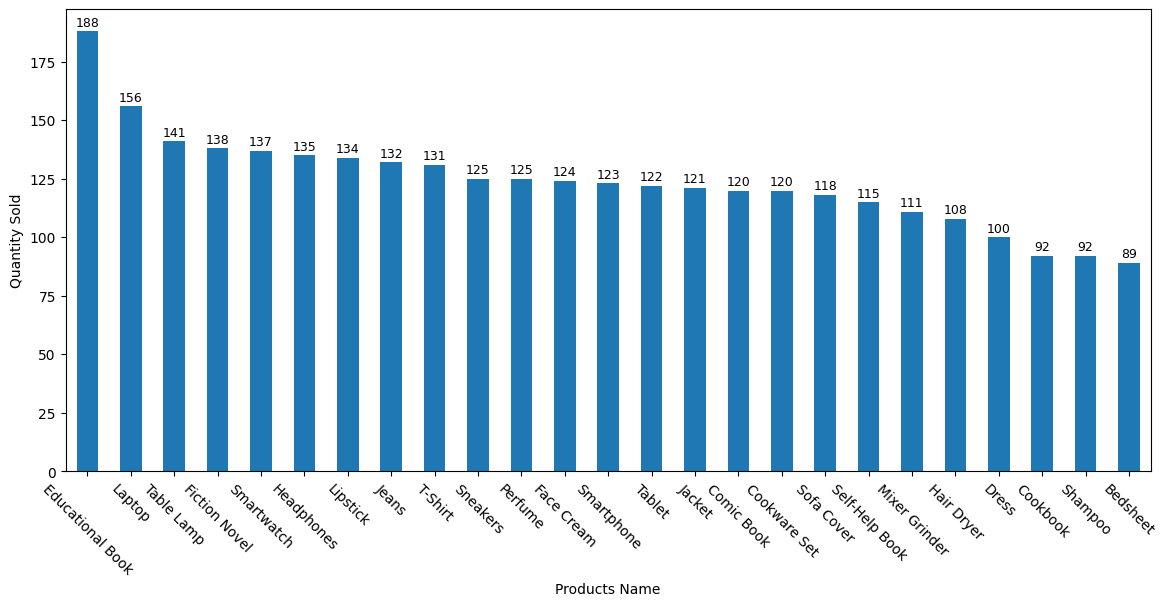

In [32]:
#Bar chart of Quantity sold per unit Product
top_products=df.groupby('Product Name')['Quantity Sold'].sum().nlargest(30)
ax=top_products.plot(kind='bar',figsize=(14,6))
plt.xlabel('Products Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=-45)
for i, v in enumerate(top_products):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=9)
plt.show()

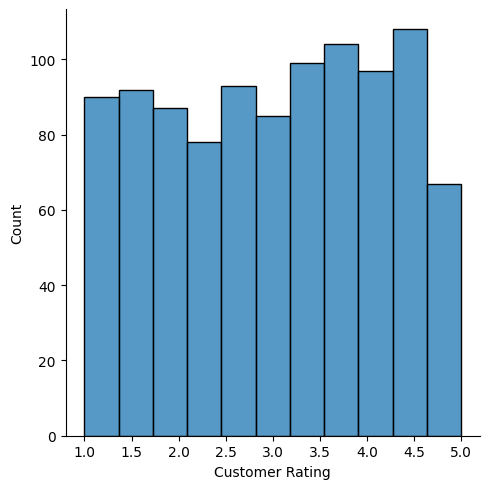

In [34]:
#Customer Rating Charts
sns.displot(df['Customer Rating'])

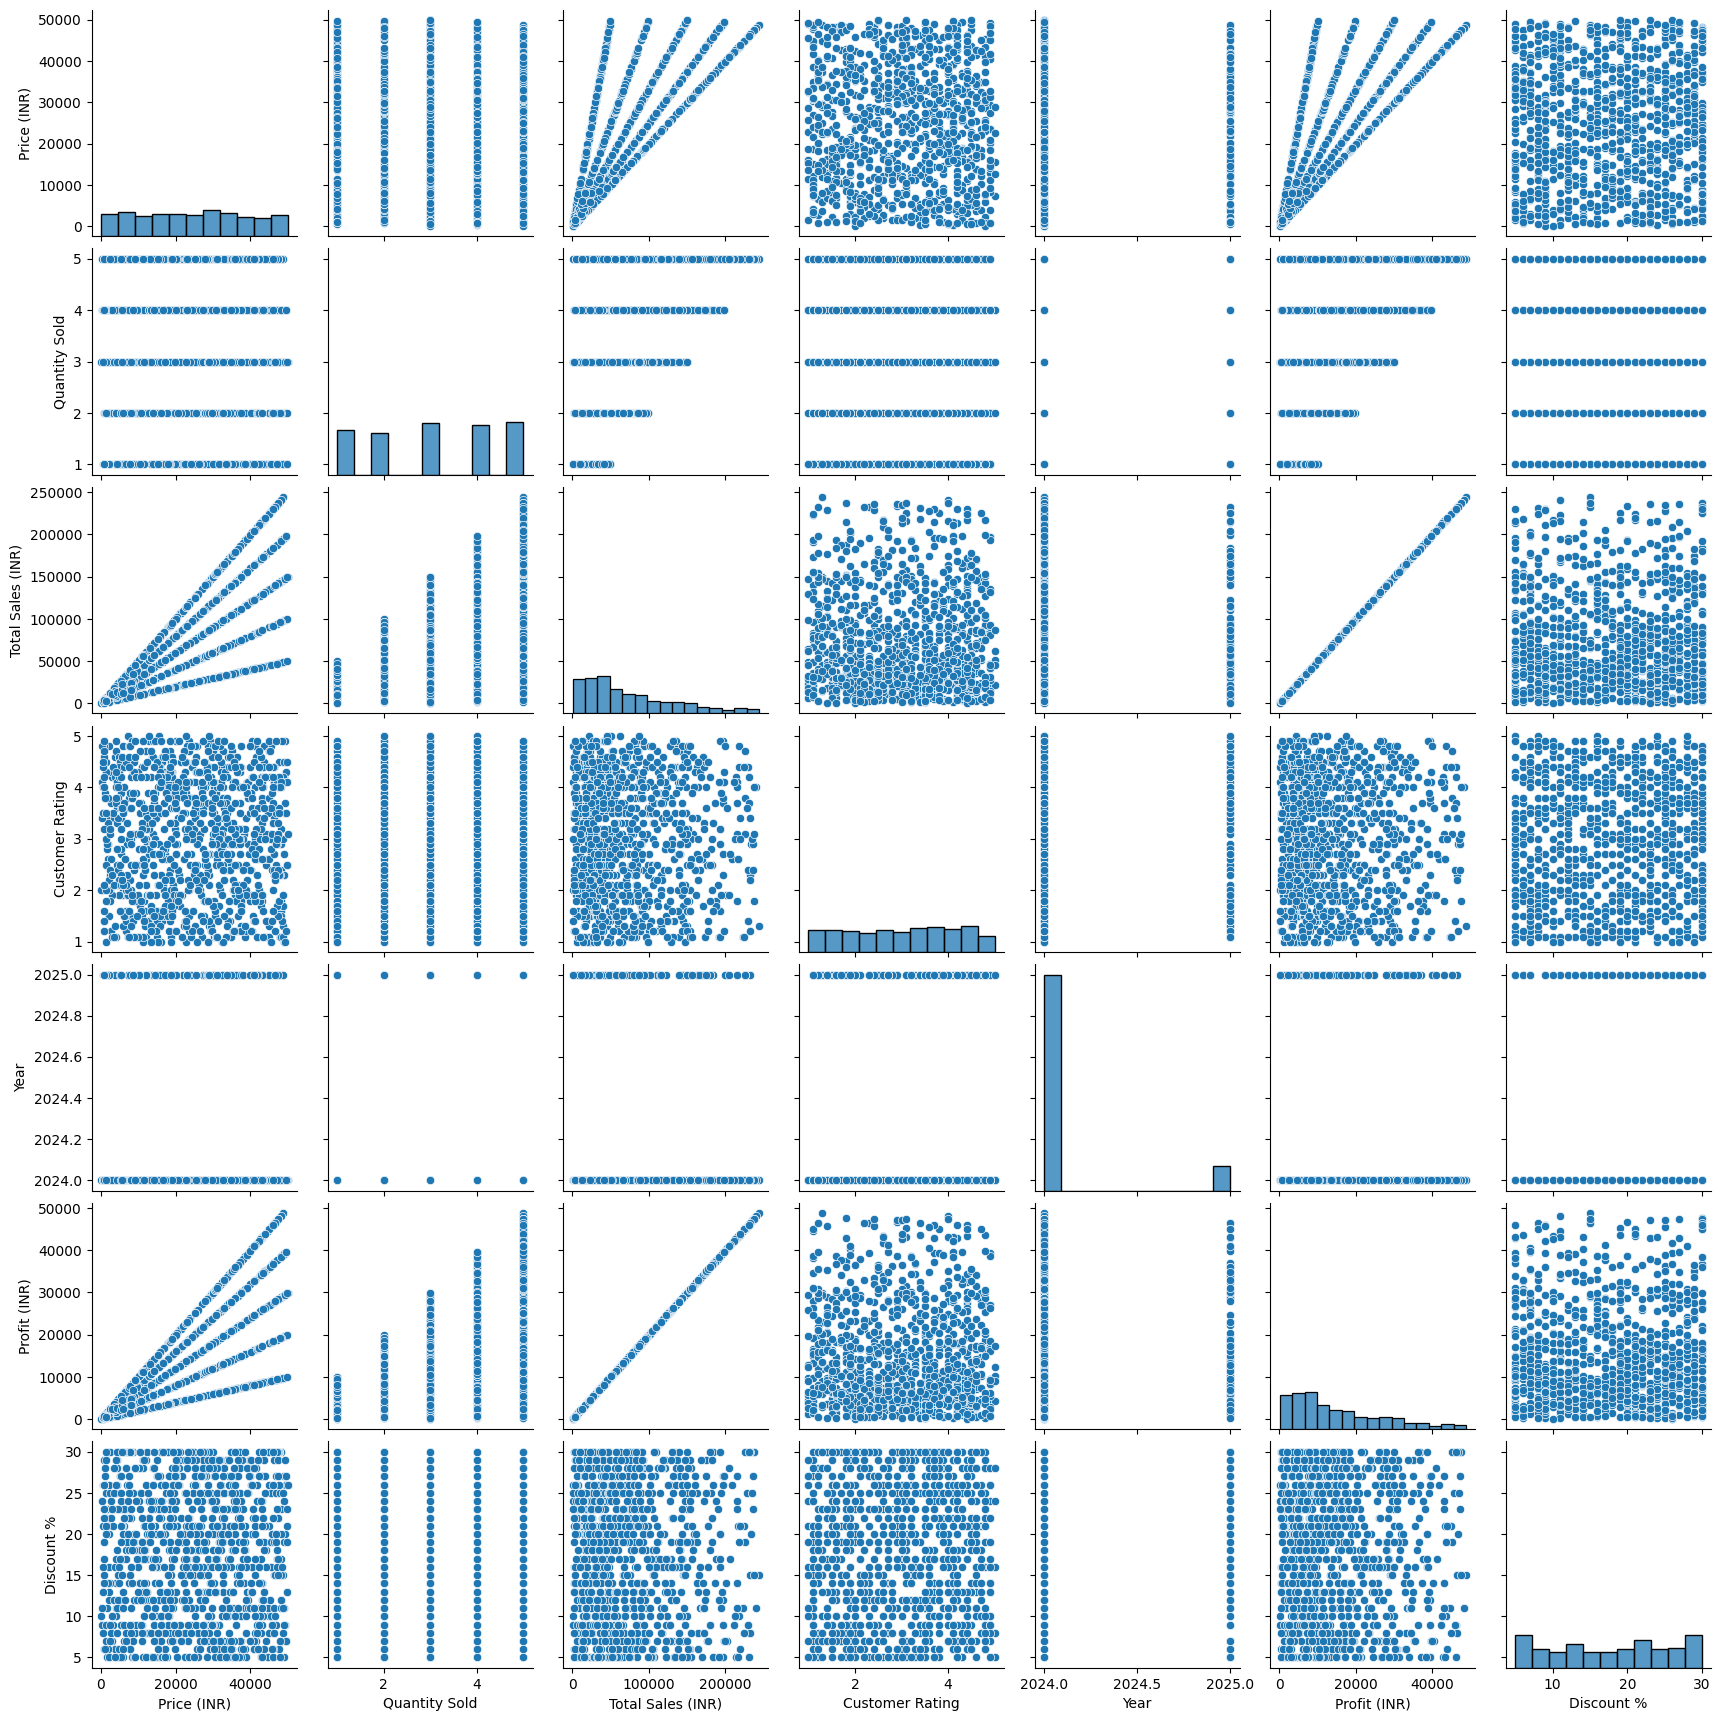

In [36]:
sns.pairplot(df)

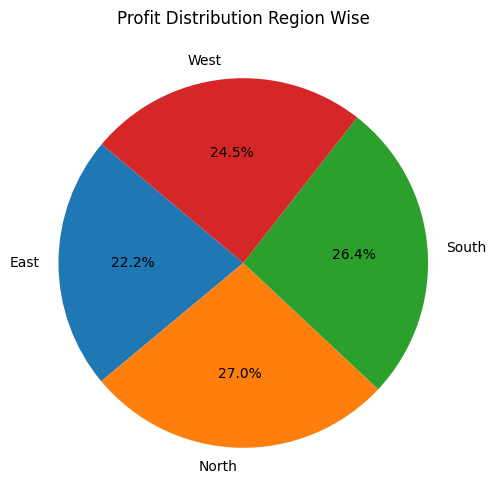

In [47]:
#Profit distribution Region Wise
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('flipkartsales.csv')

# Remove extra spaces from column names (safe practice)
df.columns = df.columns.str.strip()

# Group by Region and calculate total profit
region_profit = df.groupby('Region')['Profit (INR)'].sum()

# Plot pie chart
region_profit.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    figsize=(8,6)
)

plt.title('Profit Distribution Region Wise')
plt.ylabel('')  # remove y-label
plt.show()



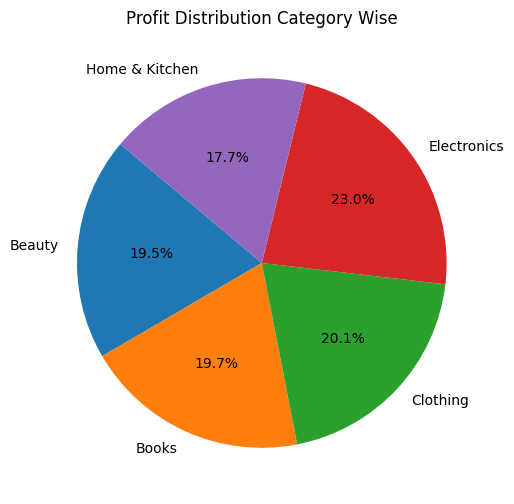

In [48]:
#Profit Distribution Category Wise
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('flipkartsales.csv')

# Clean column names
df.columns = df.columns.str.strip()

# Group by Category and calculate total profit
category_profit = df.groupby('Category')['Profit (INR)'].sum()

# Plot pie chart
category_profit.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    figsize=(8,6)
)

plt.title('Profit Distribution Category Wise')
plt.ylabel('')
plt.show()


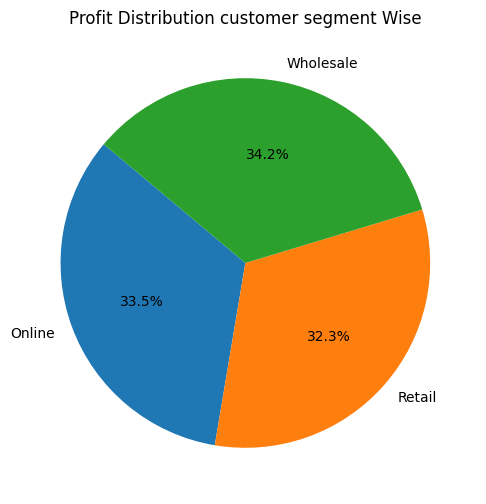

In [50]:
#Profit Distribution Category Wise
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('flipkartsales.csv')

# Clean column names
df.columns = df.columns.str.strip()

# Group by Category and calculate total profit
customer_segment_profit = df.groupby('Customer Segment')['Profit (INR)'].sum()

# Plot pie chart
customer_segment_profit .plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    figsize=(8,6)
)

plt.title('Profit Distribution customer segment Wise')
plt.ylabel('')
plt.show()
